In [1]:
import synthx as sx

### sensitivity check

In [2]:
df = sx.sample(
    n_units=200,
    n_time=50,
    n_observed_covariates=2,
    n_unobserved_covariates=1,
    intervention_units=[1, 2, 3],
    intervention_time=40,
    intervention_effect=1,
    noise_effect=0.1,
    scale=2,
    seed=42,
)

In [3]:
dataset = sx.Dataset(
    df,
    unit_column = 'unit',
    time_column = 'time',
    y_column = 'y',
    covariate_columns=['covariate_1', 'covariate_2'],
    intervention_units=[1, 2, 3],
    intervention_time=40,
)

In [4]:
effects_test, effects_placebo, sc_test, scs_placebo = sx.placebo_test(dataset)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 197/197 [00:10<00:00, 19.25it/s]


In [5]:
sx.stats.calc_p_value(effects_test, effects_placebo)

0.04282794034095059

uplift: 1.0250, p value: 0.04575325876756656.
1it [00:01,  1.07s/it, uplift=1.0250]

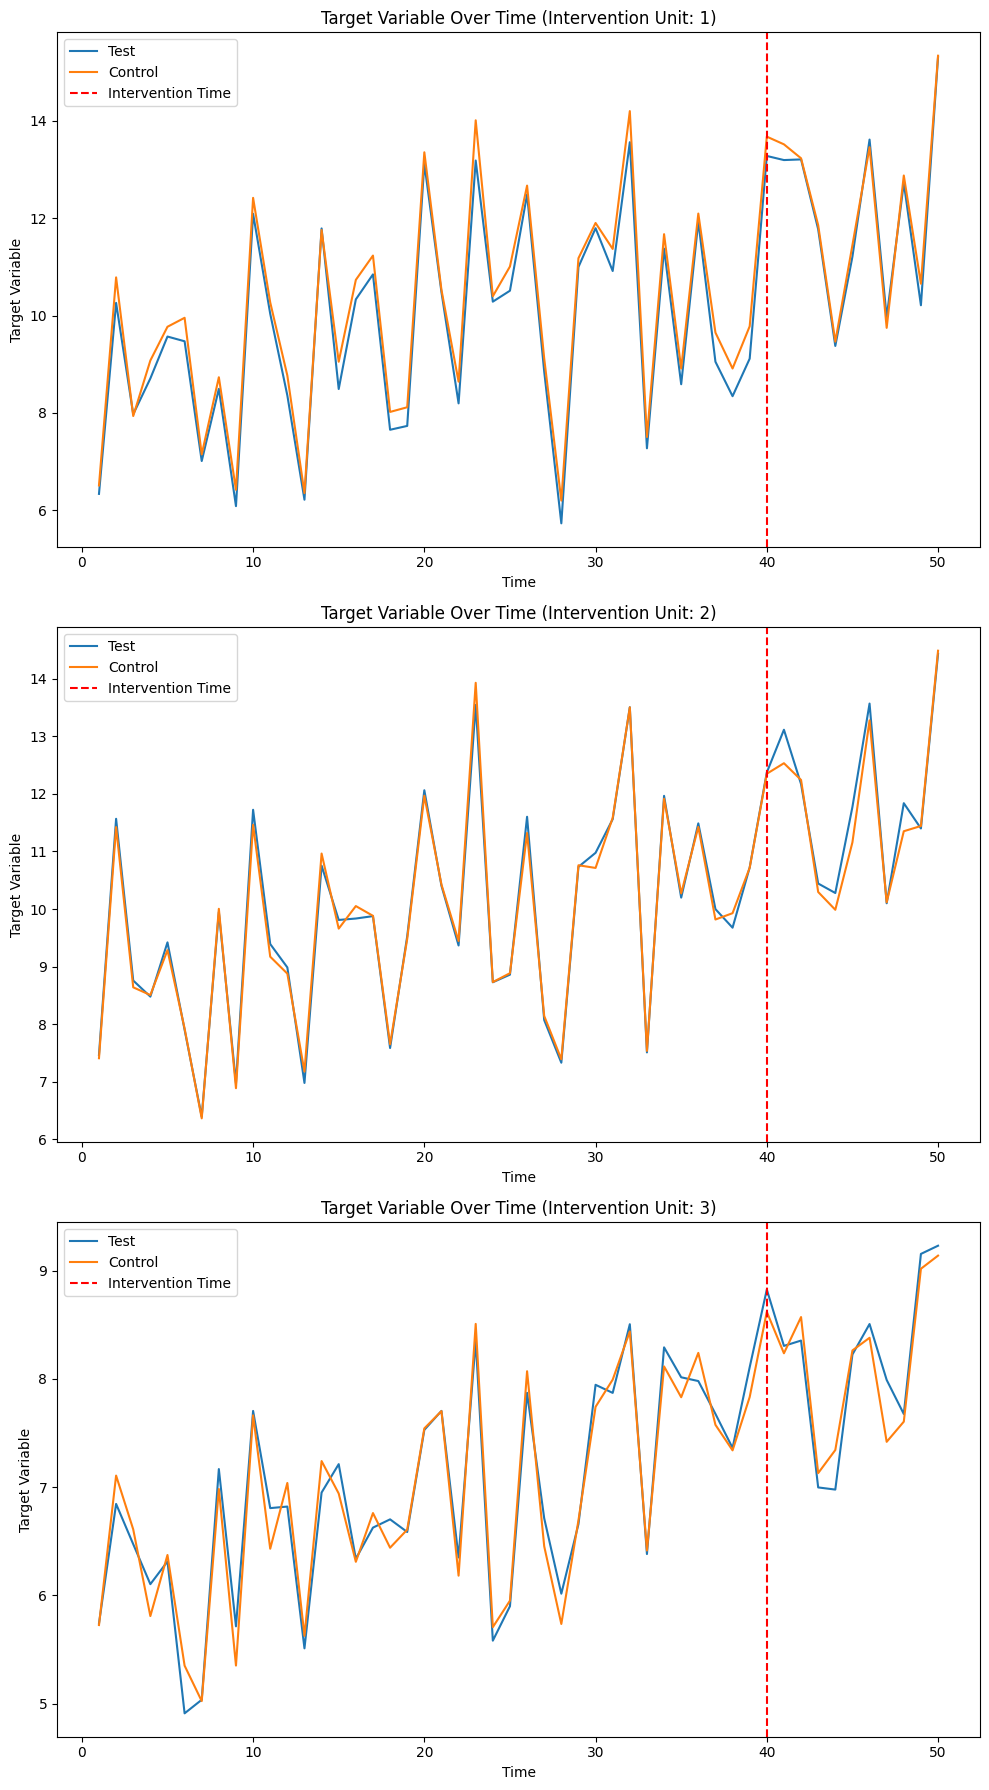

uplift: 1.0258, p value: 0.033842248172893115.
6it [00:06,  1.04s/it, uplift=1.0258]

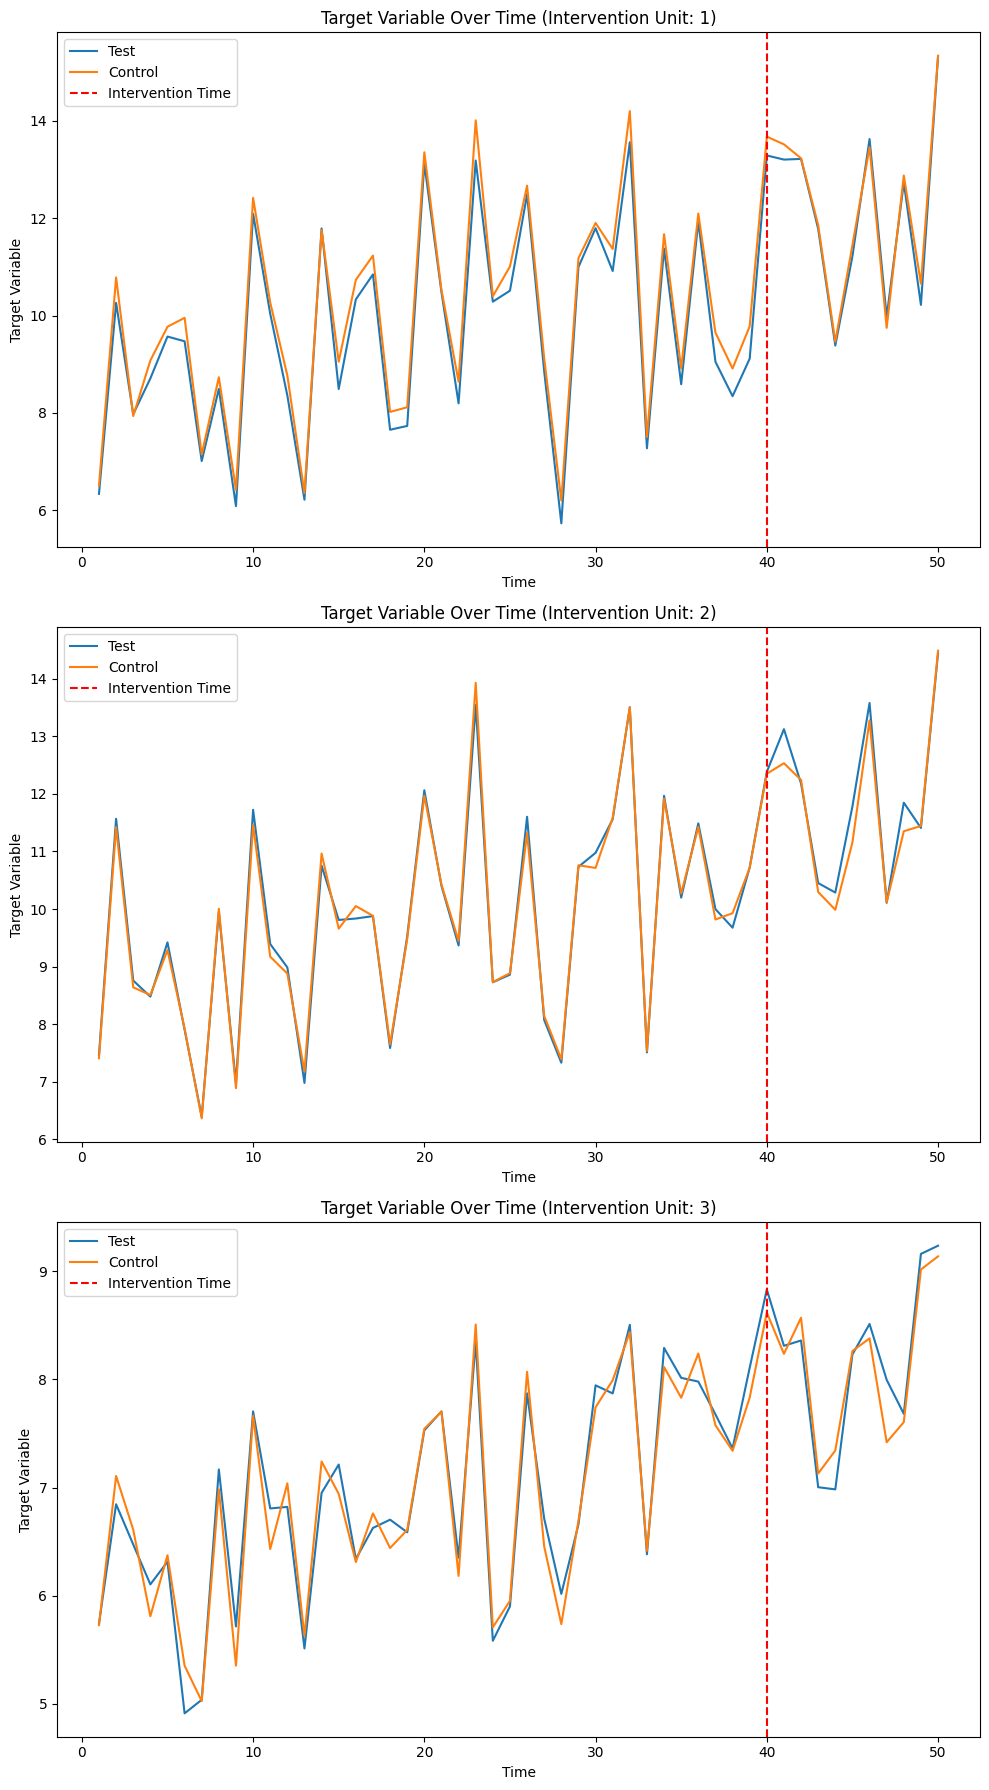

6it [00:07,  1.21s/it, uplift=1.0258]


1.0265624999999998

In [6]:
sx.placebo_sensitivity_check(dataset, effects_placebo, r=1.05, write_progress=True)

uplift: 1.0250, p value: 0.21215510703820464.
1it [00:01,  1.09s/it, uplift=1.0250]

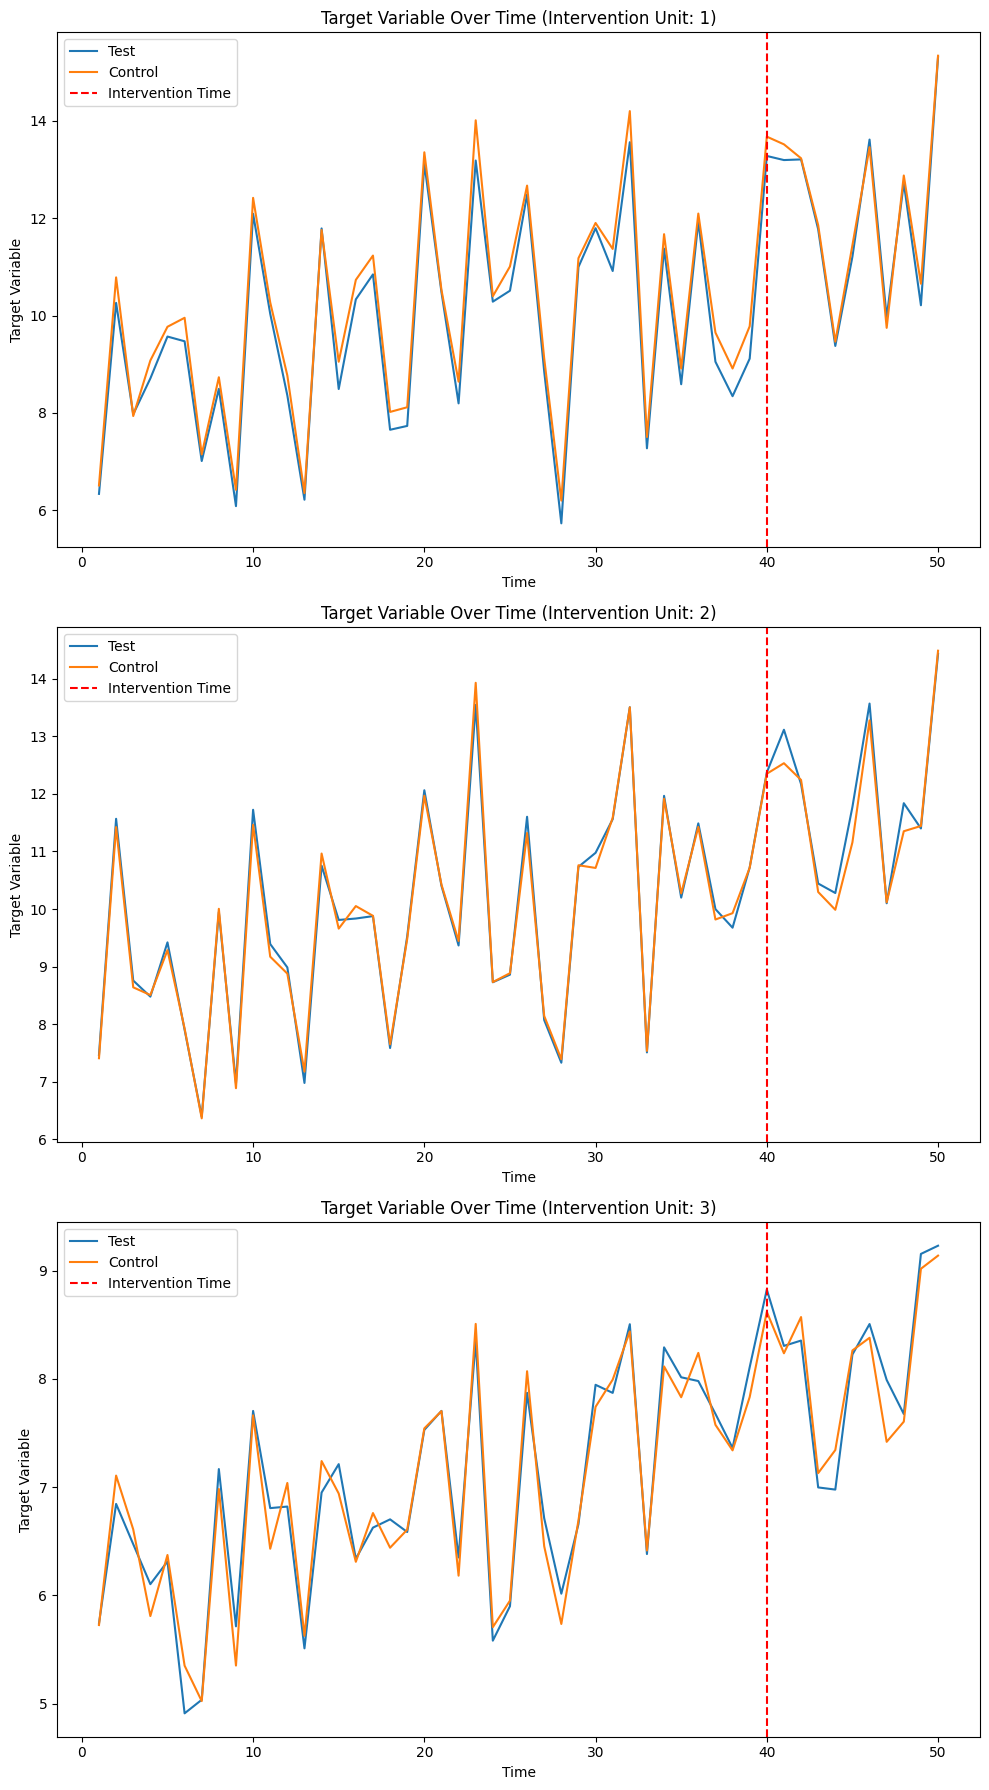

uplift: 1.0375, p value: 0.2775219995729392.
2it [00:02,  1.38it/s, uplift=1.0375]

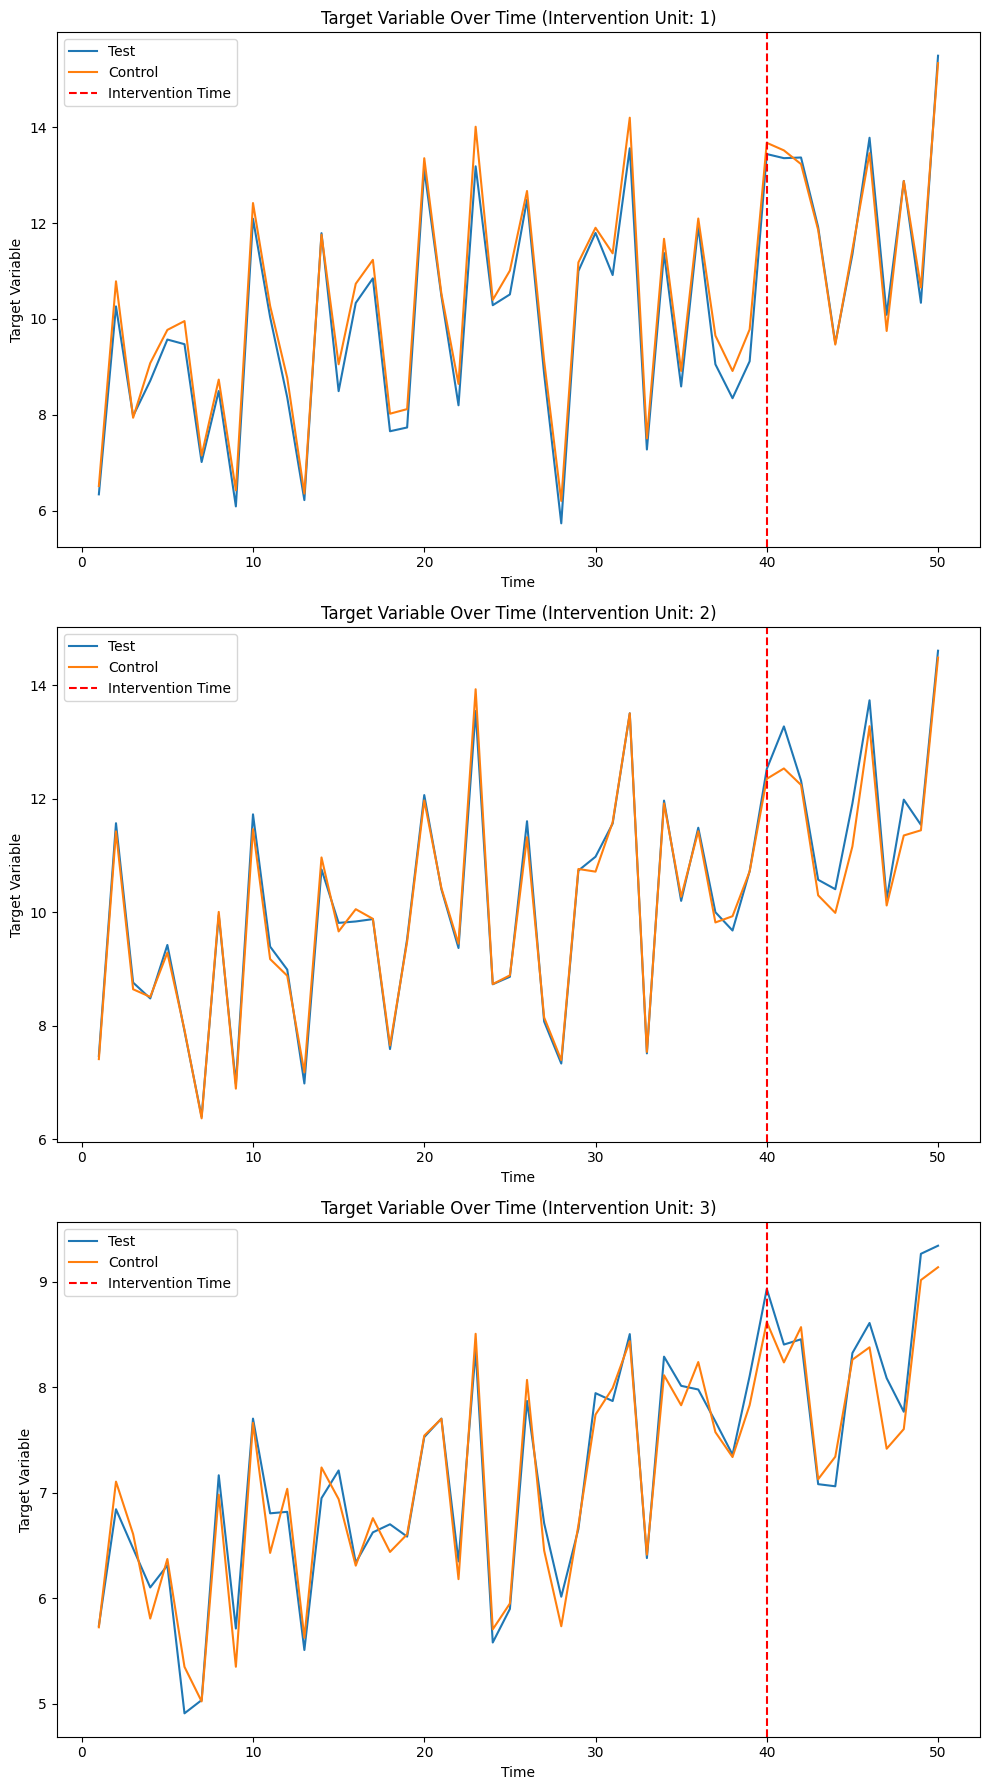

uplift: 1.0438, p value: 0.06657428370061093.
3it [00:03,  1.00s/it, uplift=1.0438]

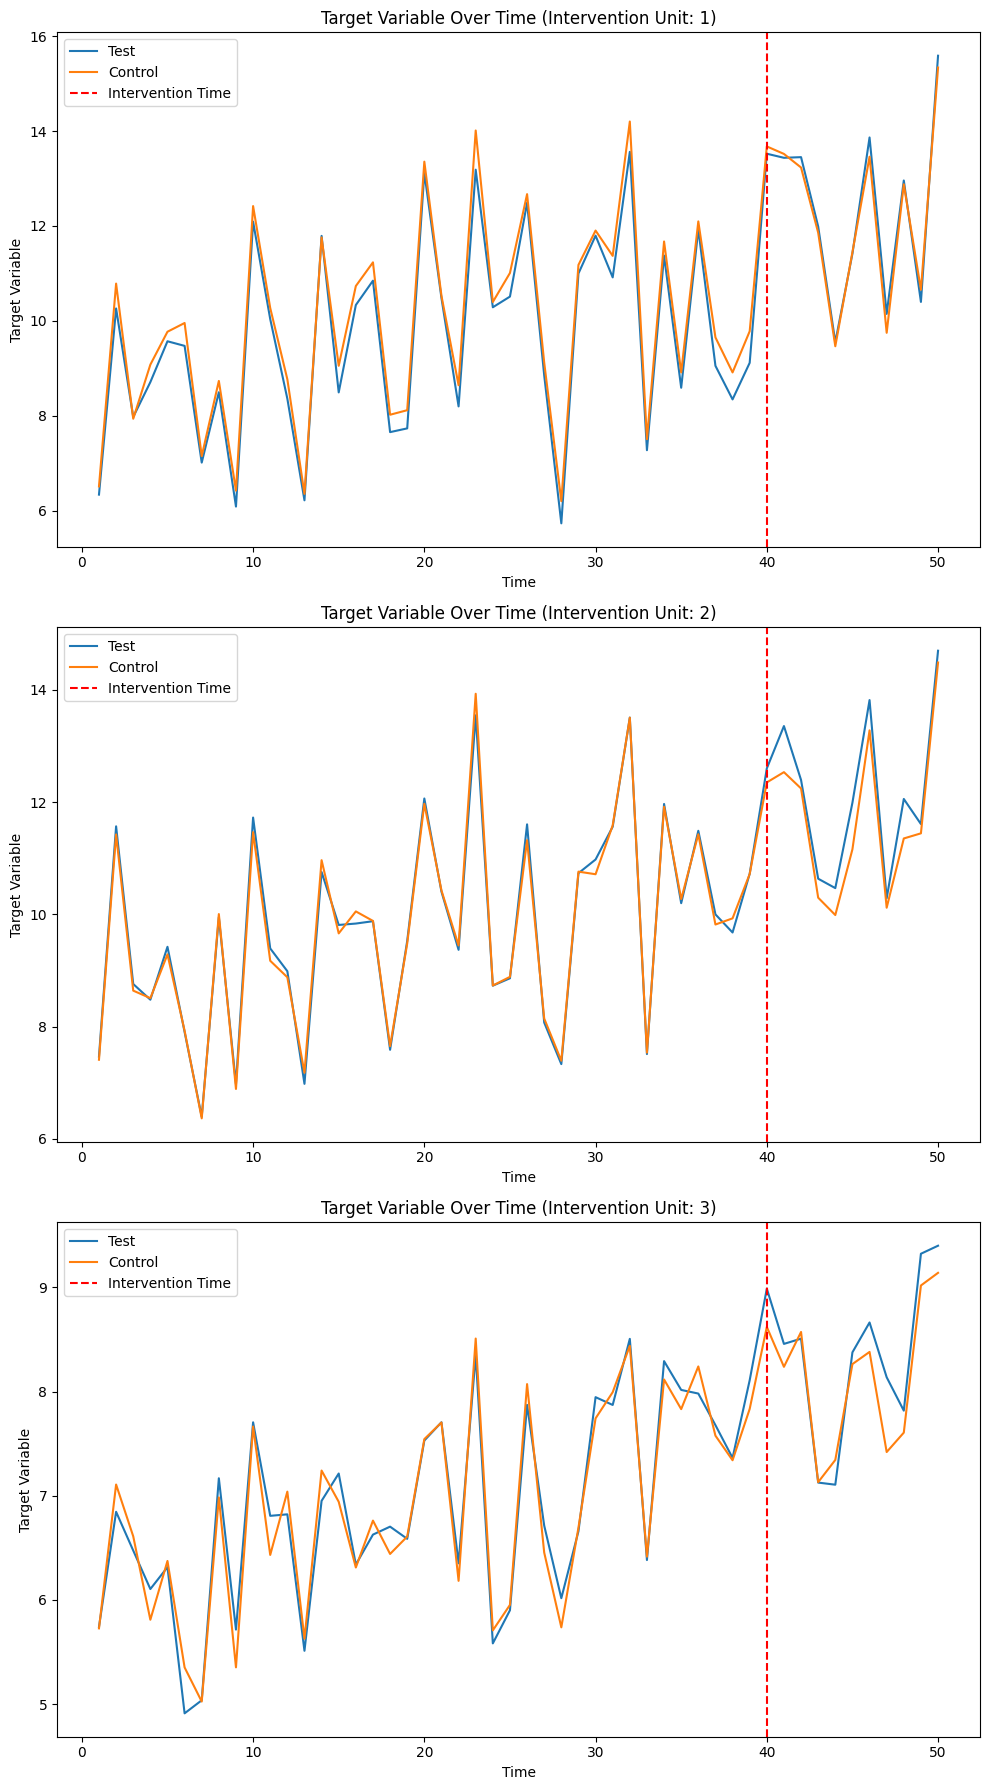

uplift: 1.0453, p value: 0.0436908403865077.
5it [00:06,  1.11s/it, uplift=1.0453]

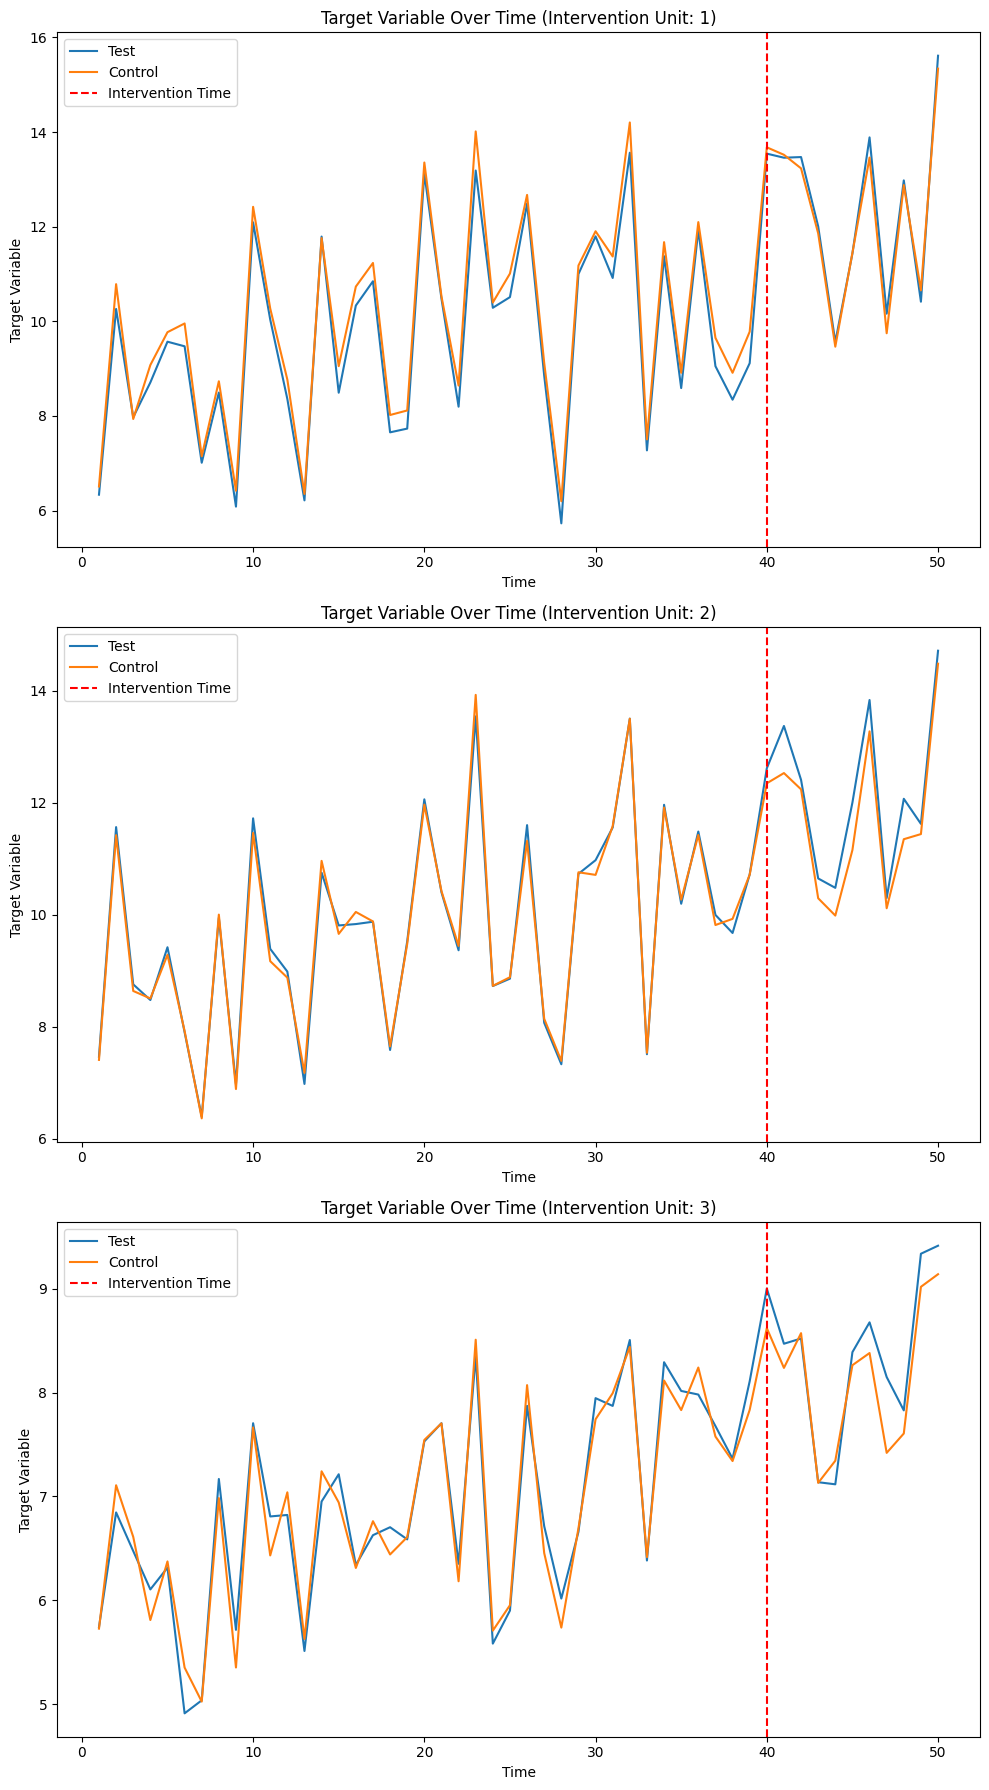

uplift: 1.0461, p value: 0.035260590732136464.
6it [00:07,  1.19s/it, uplift=1.0461]

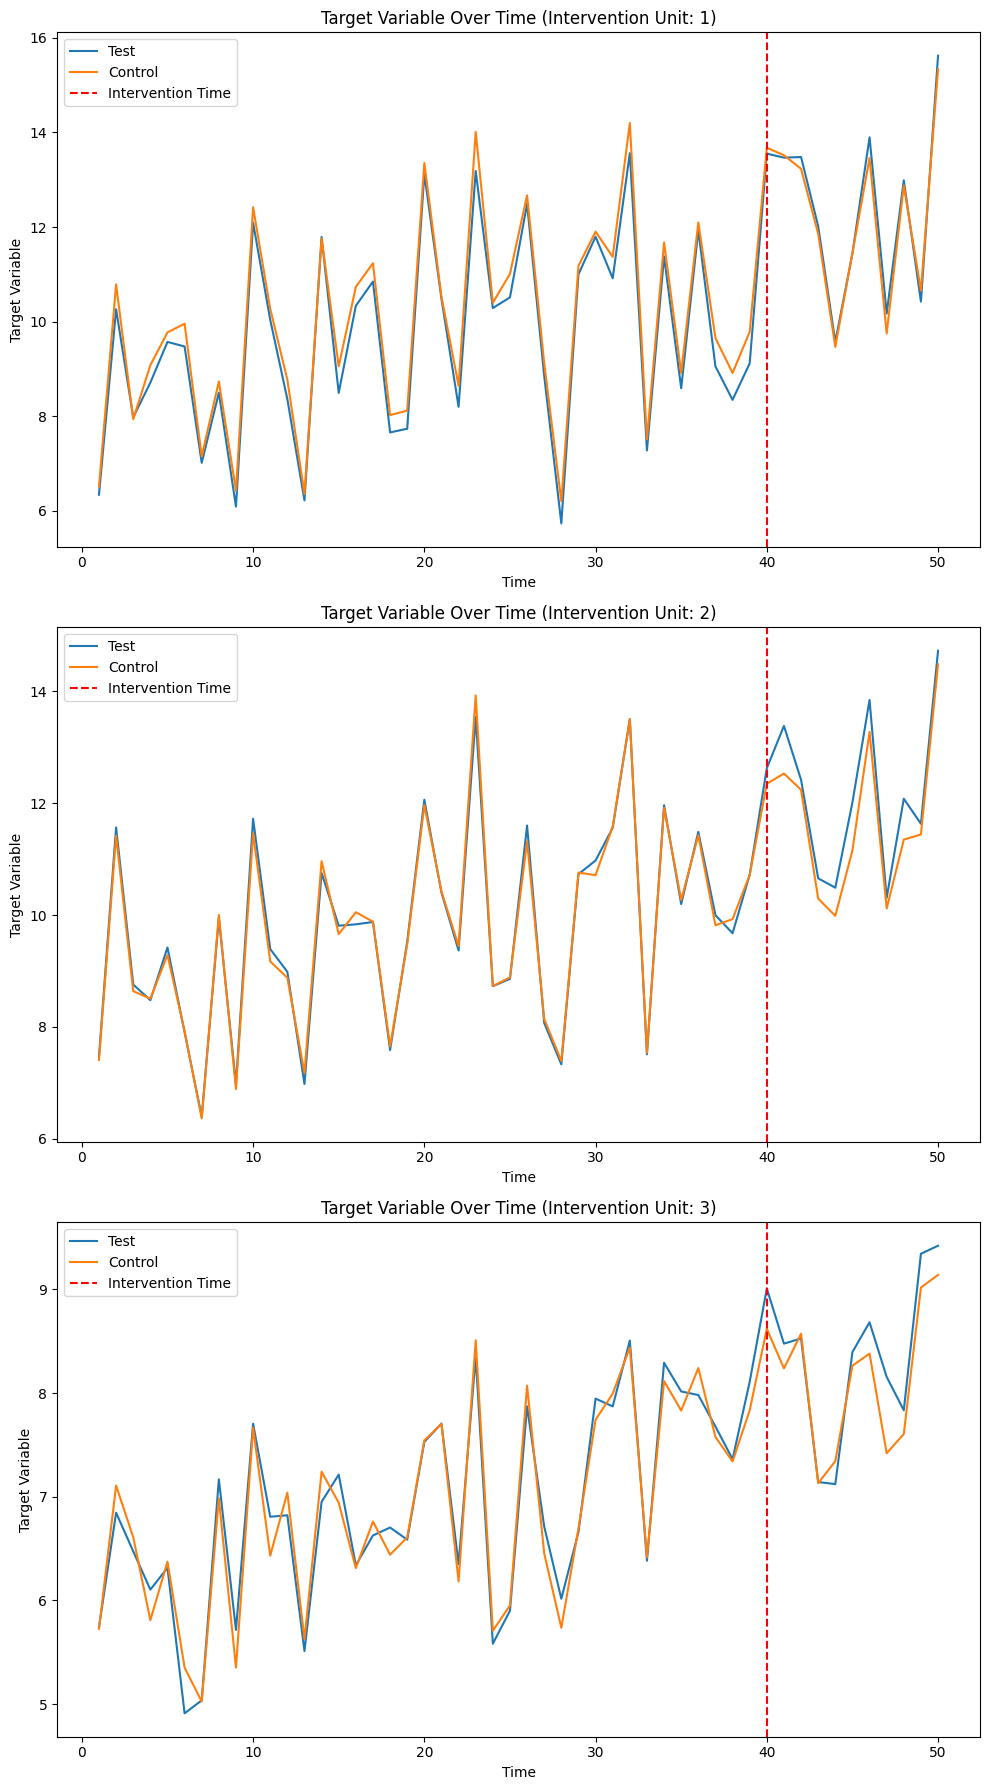

6it [00:08,  1.35s/it, uplift=1.0461]


1.046875

In [7]:
sx.ttest_sensitivity_check(dataset, r=1.05, write_progress=True)

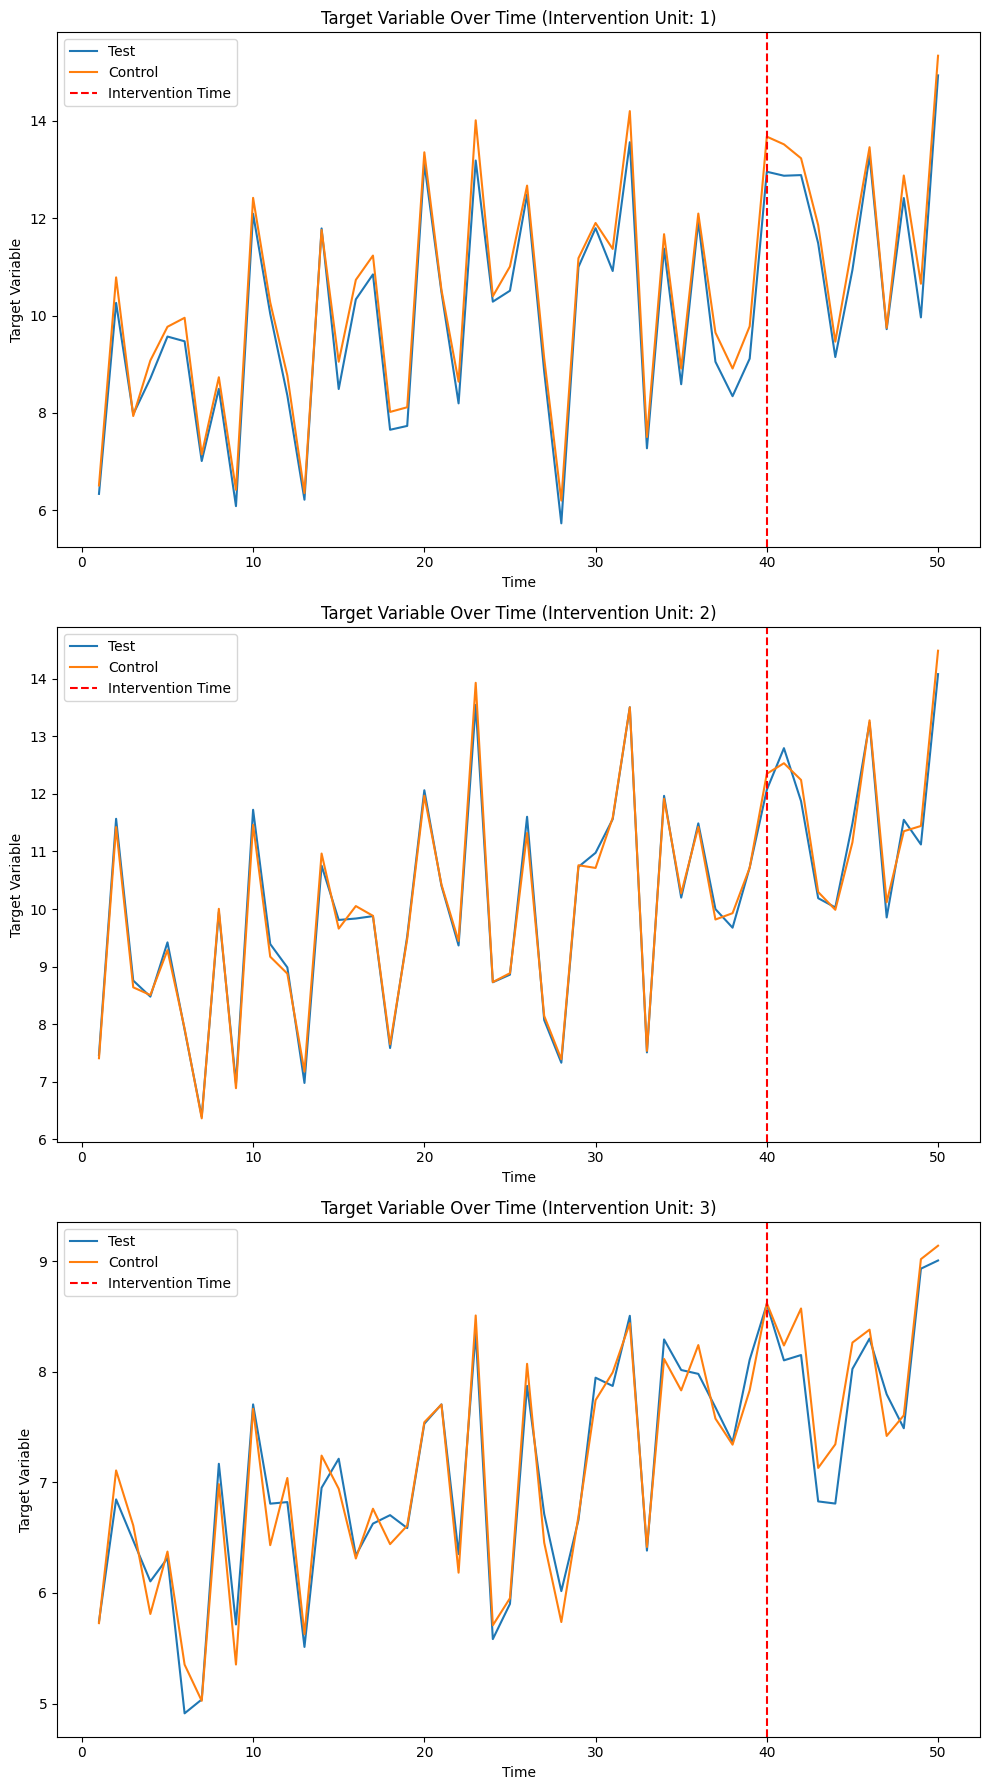

In [8]:
sc_test.plot()